# **Cluster the Customers 🧑 Who Buys What? 🛒**

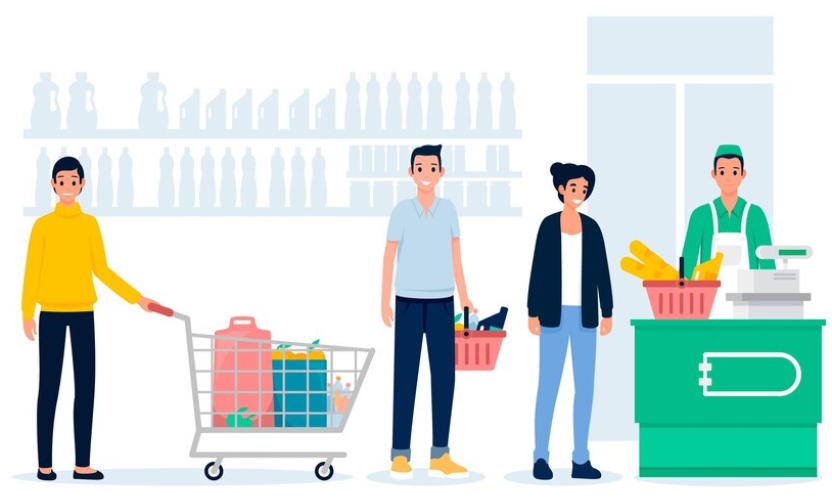

> Step into the ultimate clustering duel! Using K-Means and DBSCAN, you’ll segment wholesale customers based on their spending patterns. But the question remains—who clusters it better? From compact clusters to noisy outliers, evaluate the models using clustering metrics and determine the champion of customer segmentation. 🛒⚡

## **What’s in the Data?**

**1. Channel**
 * Wholesale customers are grouped into **Horeca (Hotel/Restaurant/Café)** or Retail.

**2. Region**
 * Customers are located in Lisbon, Oporto, or other regions.

**3. Spending Features**
 * **Fresh**: Annual spending on fresh produce.
 * **Milk**: Annual spending on dairy products.
 * **Grocery**: Spending on everyday grocery items.
 * **Frozen**: Spending on frozen foods.
 * **Detergents_Paper**: Spending on cleaning supplies and paper goods.
 * **Delicassen**: Spending on luxury foods like meats and cheeses.





# **Assignment Tasks** 📩

**1. Data Exploration and Preprocessing**
 1. **Load and Explore the Dataset**
  * Import the dataset and check for missing values.
  * Analyze the distribution of features (e.g., spending on fresh, milk, grocery).

 2. **Feature Scaling**
  * Normalize the spending features using `StandardScaler` for fair distance calculations.

 3. **Visualize Relationships**
  * Use pair plots or correlation heatmaps to identify potential relationships between features.




In [101]:
#1. Data Exploration and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [103]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [104]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


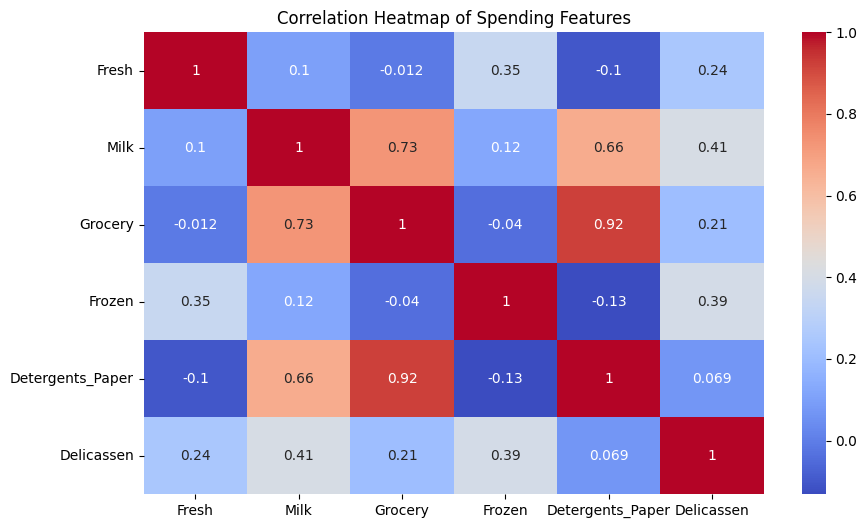

In [105]:
#3. Visualize Relationships
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Spending Features')
plt.show()

In [106]:
#2. Feature Scaling
from sklearn.preprocessing import StandardScaler

spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[spending_features])


**2. K-Means Clustering**
 1. **Determine the Optimal Clusters (k)**
  * Use the **Elbow Method** or **Silhouette Analysis** to find the optimal number of clusters.

 2. **Apply K-Means Algorithm**
  * Cluster the data into the chosen number of clusters.

 3. **Cluster Analysis**
  * Examine the characteristics of each cluster and summarize key patterns.


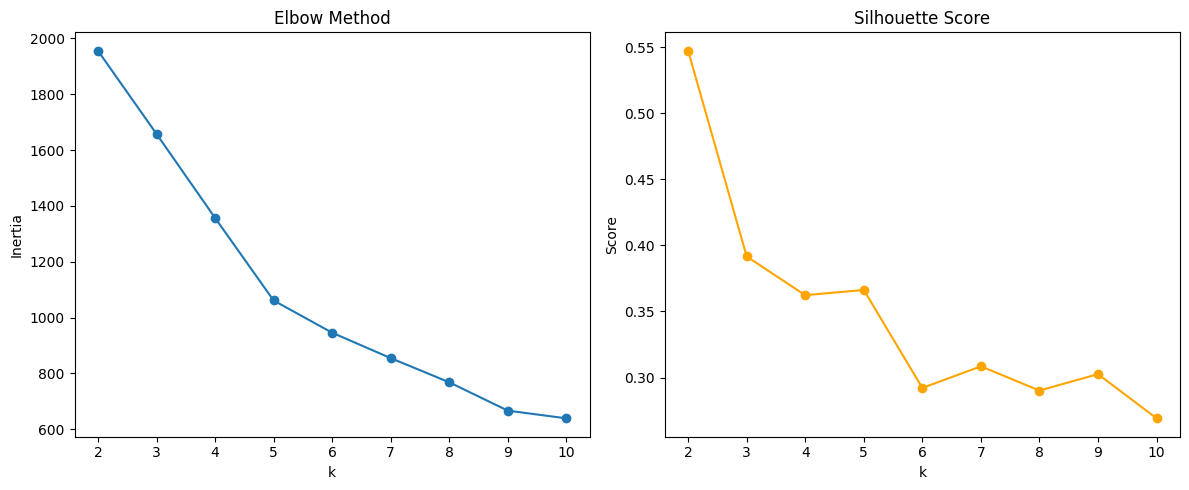

In [107]:
#1. Determine the Optimal Clusters (k)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, 'o-', color='orange')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [108]:
#2. Apply K-Means Algorithm
optimal_k = sil_scores.index(max(sil_scores)) + 2  # +2 because range started at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels

In [109]:
#3. Cluster Analysis
# View average spending per cluster
df.groupby('KMeans_Cluster')[spending_features].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
KMeans_Cluster,,,,,,
0,12157.300771,4028.169666,5402.722365,3066.066838,1667.688946,1256.894602
1,10802.764706,19282.333333,27390.254902,3116.666667,12139.725490,3568.843137


**3. DBSCAN Clustering**
 1. **Parameter Tuning for DBSCAN**
  * Experiment with different values of `eps` (neighborhood radius) and `min_samples` (minimum points in a neighborhood).

 2. **Apply DBSCAN Algorithm**
  * Cluster the data using DBSCAN and identify core points, border points, and outliers.

 3. **Cluster and Outlier Analysis**
  * Summarize the clusters and analyze how DBSCAN handles noise and varying densities.





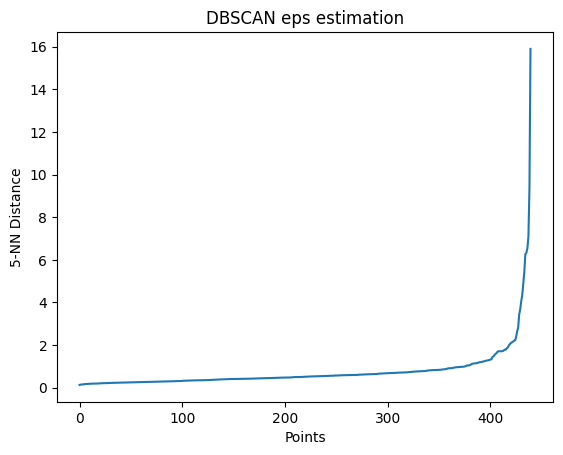

In [110]:
#1. Parameter Tuning for DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

# Sort and plot k-distance
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('DBSCAN eps estimation')
plt.xlabel('Points')
plt.ylabel('5-NN Distance')
plt.show()


In [111]:
#2. Apply DBSCAN Algorithm
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = dbscan_labels


In [112]:
#3. Cluster and Outlier Analysis
# Count each cluster and outliers
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
0,413
-1,27


**4. Clustering Evaluation**
 1. **Evaluate both K-Means and DBSCAN using metrics such as**
  * **Silhouette Score**: Measures cluster cohesion and separation.
  * **Davies-Bouldin Index**: Evaluates the compactness and separation of clusters.

 2. **External Metrics (if applicable)**
  * If you have ground truth labels (e.g., Channel or Region), evaluate using metrics like **Adjusted Rand Index (ARI)**.

 3. **Cluster Visualization**
  * Use dimensionality reduction techniques like **PCA** or **t-SNE** to visualize clusters for both algorithms.






In [113]:
#1 & 2. Evaluate both K-Means and DBSCAN using metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score

print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))
print("KMeans DB Index:", davies_bouldin_score(scaled_data, kmeans_labels))

mask = dbscan_labels != -1

# Check if there are at least 2 unique cluster labels after applying the mask
unique_labels = np.unique(dbscan_labels[mask])
if len(unique_labels) >= 2:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[mask], dbscan_labels[mask]))
    print("DBSCAN DB Index:", davies_bouldin_score(scaled_data[mask], dbscan_labels[mask]))
else:
    print("Silhouette Score cannot be calculated for DBSCAN as there are less than 2 clusters after outlier removal.")

KMeans Silhouette Score: 0.5472146913441881
KMeans DB Index: 1.1317699411896287
Silhouette Score cannot be calculated for DBSCAN as there are less than 2 clusters after outlier removal.


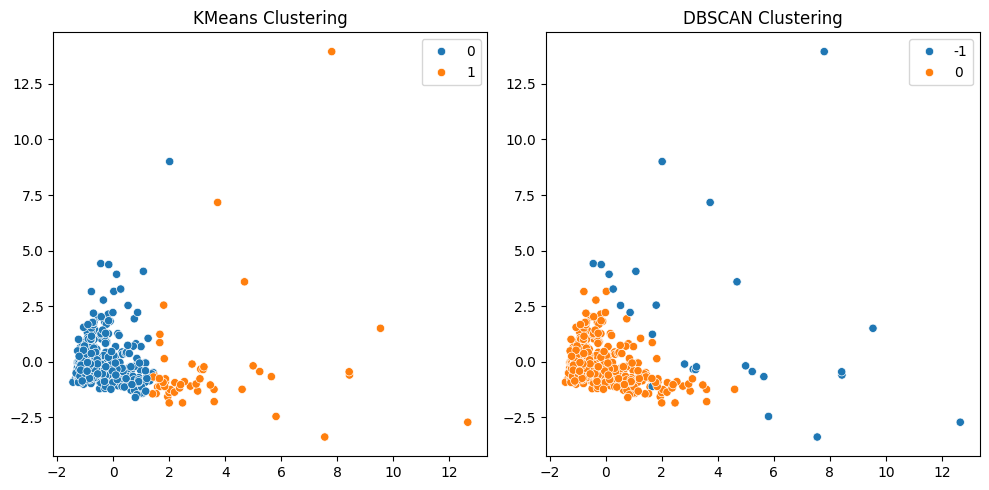

In [114]:
#3. Cluster Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=kmeans_labels, palette='tab10')
plt.title('KMeans Clustering')

plt.subplot(1,2,2)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_labels, palette='tab10')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


**5. K-Means vs. DBSCAN: The Comparison**
 1. **Cluster Quality**
  * Compare metrics (e.g., Silhouette Score, Davies-Bouldin Index) to assess the quality of clusters.

 2. **Handling Noise**
  * Highlight how DBSCAN identifies outliers while K-Means does not.

 3. **Cluster Shapes**
  * Discuss how DBSCAN handles arbitrary-shaped clusters compared to K-Means’ preference for spherical clusters.

 4. **Computational Efficiency**
  * Compare runtime performance and scalability of both algorithms.



In [115]:
#1. Cluster Quality
print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))
print("KMeans DB Index:", davies_bouldin_score(scaled_data, kmeans_labels))

mask = dbscan_labels != -1

# Check if there are at least 2 unique cluster labels after applying the mask
unique_labels = np.unique(dbscan_labels[mask])
if len(unique_labels) >= 2:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[mask], dbscan_labels[mask]))
    print("DBSCAN DB Index:", davies_bouldin_score(scaled_data[mask], dbscan_labels[mask]))
else:
    print("Silhouette Score cannot be calculated for DBSCAN as there are less than 2 clusters after outlier removal.")

KMeans Silhouette Score: 0.5472146913441881
KMeans DB Index: 1.1317699411896287
Silhouette Score cannot be calculated for DBSCAN as there are less than 2 clusters after outlier removal.


In [116]:
#2. Handling Noise
# Check how many outliers (labeled -1) DBSCAN detected
num_outliers = (dbscan_labels == -1).sum()
print(f"DBSCAN detected {num_outliers} outliers.")


DBSCAN detected 27 outliers.


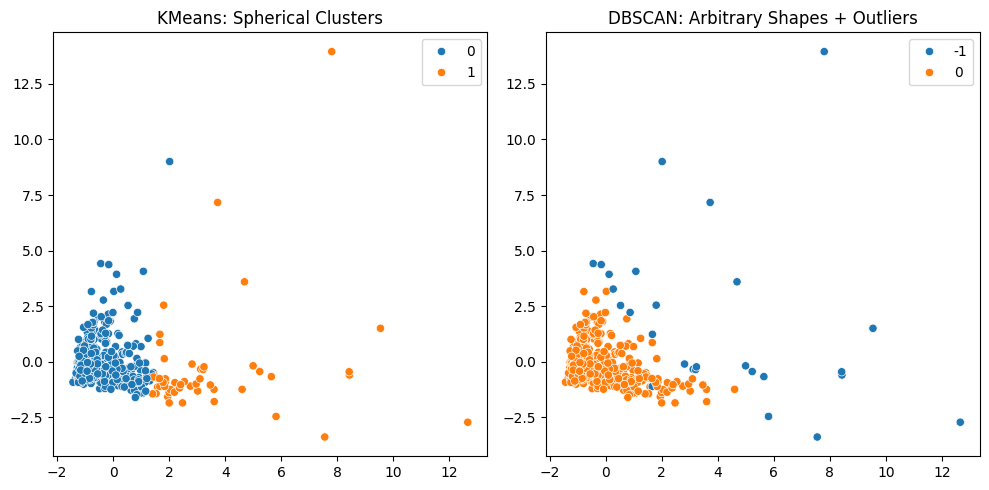

In [117]:
#3. Cluster Shapes
# Already shown before in Section 4.3 (PCA scatterplots)
# But here's a quick reminder:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=kmeans_labels, palette='tab10')
plt.title('KMeans: Spherical Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_labels, palette='tab10')
plt.title('DBSCAN: Arbitrary Shapes + Outliers')

plt.tight_layout()
plt.show()


In [118]:
#4. Computational Efficiency
import time

# KMeans timing
start = time.time()
KMeans(n_clusters=optimal_k, random_state=0).fit(scaled_data)
kmeans_time = time.time() - start

# DBSCAN timing
start = time.time()
DBSCAN(eps=1.5, min_samples=5).fit(scaled_data)
dbscan_time = time.time() - start

print(f"KMeans runtime: {kmeans_time:.4f} seconds")
print(f"DBSCAN runtime: {dbscan_time:.4f} seconds")


KMeans runtime: 0.0080 seconds
DBSCAN runtime: 0.0088 seconds


# **K-Means vs. DBSCAN on Wholesale Shopping Patterns!**

Enter the ultimate battle of clustering algorithms! From K-Means' sleek and spherical clusters to DBSCAN's density-driven magic, unravel the secrets of wholesale customer segmentation. Who will handle noise, outliers, and spending quirks better? Let the clustering showdown begin! 🛒⚡